In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings

warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson

from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"D:\Cindy\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#replace false value with most appropriate value
df['caa'] = df['caa'].replace([4],3)

In [4]:
#replace false value with most appropriate value
df['thall'] = df['thall'].replace([0],3) 

In [5]:
#正态化
df["trtbps"] = 1/df["trtbps"]
df["chol"] = np.log1p(df["chol"])
df["thalachh"] = boxcox(df["thalachh"])[0]
df["oldpeak"] = yeojohnson(df["oldpeak"])[0]

In [7]:
#归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
columns_to_scale = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'] 
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

In [6]:
#标准化
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'] 
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [7]:
#哑变量
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['restecg'], prefix = "restecg")
c = pd.get_dummies(df['slp'], prefix = "slp")
d = pd.get_dummies(df['caa'], prefix = "caa")
e = pd.get_dummies(df['thall'], prefix = "thall")

frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'restecg', 'slp', 'caa', 'thall'])

df.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_0.0,...,slp_0.0,slp_0.5,slp_1.0,caa_0.0,caa_0.3333333333333333,caa_0.6666666666666666,caa_1.0,thall_0.0,thall_0.5,thall_1.0
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,1,0,...,1,0,0,1,0,0,0,1,0,0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,1,0,...,0,0,1,1,0,0,0,0,1,0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,1,1,...,0,0,1,1,0,0,0,0,1,0


In [8]:
X= df.drop(['output'], axis=1)
y= df['output']

In [9]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.336370,0.409432,1.0,0.0,0.461653,0.0,0.717078,0.0,0.0,0.0,1
1,0.166667,1.0,0.666667,0.477504,0.456417,0.0,0.5,0.824395,0.0,0.842972,0.0,0.0,0.5,1
2,0.250000,0.0,0.333333,0.477504,0.320790,0.0,0.0,0.665423,0.0,0.565692,1.0,0.0,0.5,1
3,0.562500,1.0,0.333333,0.591195,0.417967,0.0,0.5,0.727037,0.0,0.406471,1.0,0.0,0.5,1
4,0.583333,0.0,0.000000,0.591195,0.688667,0.0,0.5,0.577886,1.0,0.334344,1.0,0.0,0.5,1


In [10]:
#dCor
#df.drop(columns = ['trtbps', 'restecg','caa','thall'])

In [11]:
#dHSIC
#df.drop(columns = ['trtbps', 'restecg','thall'])

In [12]:
#CE
#df.drop(columns = ['trtbps', 'restecg'])

In [13]:
from sklearn.model_selection import train_test_split
#devide Dataset into test and train
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)
#check those dataset
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


In [14]:
class evaluate:
    def __init__(self, result):
        self.conf_mat = self.make_conf_mat(result)
        
    def make_conf_mat(self, temp):
        temp = temp.copy()
        temp.columns = ['true', 'pred']
        temp['conf'] = 2 * temp['pred'] + temp['true']
        conf = temp.groupby('conf').count()
        
        # confusion matrix
        # TP FP
        # FN TN
        # TP 3; TN 0; FP 2; FN 1
        conf_mat = np.zeros(4)
        for i in range(4):
            try:
                conf_mat[i] = conf.loc[3-i][1]
            except:
                continue

        return conf_mat.reshape(2,2).astype(np.int16)
    
    def accuracy(self):
        return np.diag(self.conf_mat).sum() / np.sum(self.conf_mat)

    def precision(self):
        return self.conf_mat[0,0] / self.conf_mat[0,:].sum()

    def recall(self):
        return self.conf_mat[0,0] / self.conf_mat[:,0].sum()    

    def f_score(self):
        pre = self.precision()
        rec = self.recall()
        return 2*pre*rec / (pre+rec)
    
    def TPR(self):
        return self.recall()

    def FPR(self):
        return self.conf_mat[0,1] / self.conf_mat[:,1].sum() 
    
    def show_all(self):
        metric = pd.DataFrame({
            'accuracy':self.accuracy(),
            'precision':self.precision(),
            'recall':self.recall(),
            'f-score':self.f_score(),
            'TPR':self.TPR(),
            'FPR':self.FPR()
        }, index=['evaluation']).T
        return metric

    def plot_confusion_matrix(self, classes=['yes','no'], normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
        cm = self.conf_mat.T
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        plt.grid(None)
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(tol=5,random_state=999)
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
          'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
         'class_weight':['balanced',None]}
lr_model = GridSearchCV(lr,param_grid=params)
lr_model.fit(X_train,y_train)
# Printing best parameters choosen through GridSearchCV
print(lr_model.best_params_)

{'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}


In [16]:
real = pd.DataFrame(y_test.tolist())
pred = pd.DataFrame(lr_model.best_estimator_.predict(X_test).tolist())
real['pred'] = pred
real.columns = ['real','pred']
result = real
eva = evaluate(result)  
eva.show_all()

,evaluation
accuracy,0.868132
precision,0.933333
recall,0.823529
f-score,0.875000
TPR,0.823529
FPR,0.075000


In [17]:
plt.grid(None)
eva.plot_confusion_matrix(normalize=False)
#plt.savefig('lr(dummy).png', dpi=300, bbox_inches = 'tight')

Confusion matrix, without normalization
[[42  9]
 [ 3 37]]


In [18]:
#Get predicted probabilites
target_probailities_lr = lr_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,
                                                             target_probailities_lr)

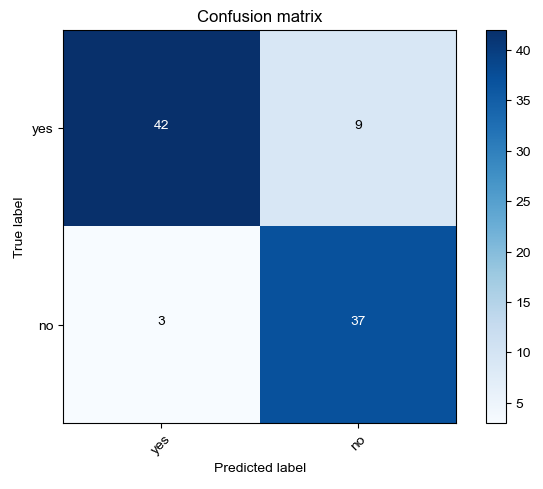

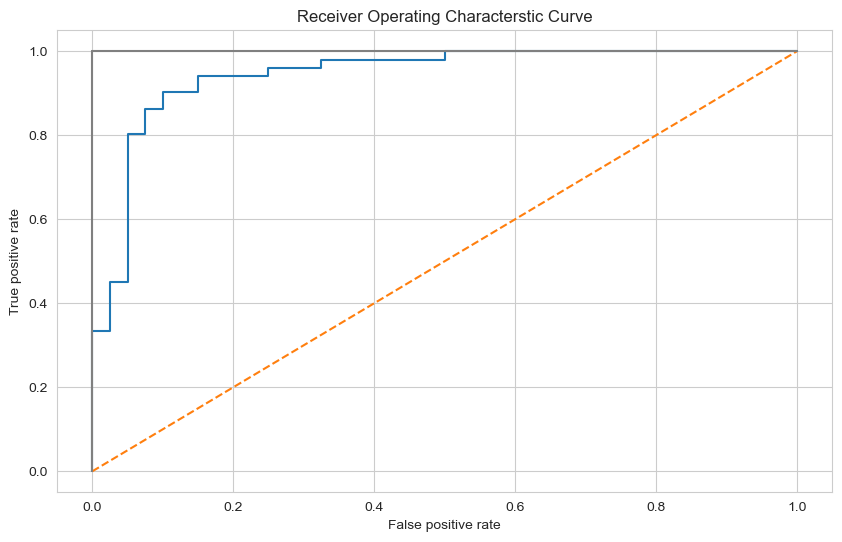

In [19]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
#plt.savefig('lrROC(dummy).png', dpi=300, bbox_inches = 'tight')
plt.show()

In [20]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_lr)

0.9441176470588235

### Desicion Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=999)
#Setting parameters for GridSearchCV
params = {'criterion': ['gini','entropy'],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth':[*range(1,10)], 
          'min_samples_leaf':[*range(1,50,5)]}
tree_model = GridSearchCV(dtree, param_grid=params)
tree_model.fit(X_train,y_train)
#Printing best parameters selected through GridSearchCV
print(tree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1}


In [10]:
real = pd.DataFrame(y_test.tolist())
pred = pd.DataFrame(tree_model.best_estimator_.predict(X_test).tolist())
real['pred'] = pred
real.columns = ['real','pred']
result = real
eva = evaluate(result)  
eva.show_all()

,evaluation
accuracy,0.780220
precision,0.844444
recall,0.745098
f-score,0.791667
TPR,0.745098
FPR,0.175000


Confusion matrix, without normalization
[[38 13]
 [ 7 33]]


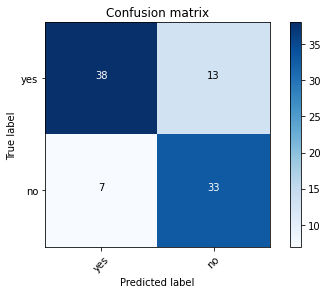

In [11]:
plt.grid(None)
eva.plot_confusion_matrix(normalize=False)
plt.savefig('tree(不处理).png', dpi=300, bbox_inches = 'tight')

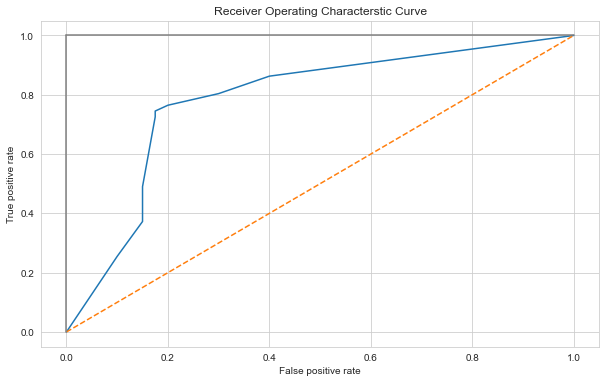

0.7830882352941178


In [12]:
#Get predicted probabilites
target_probailities_tree = tree_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.savefig('treeROC(不处理).png', dpi=300, bbox_inches = 'tight')
plt.show()
#Calculate area under the curve
print(roc_auc_score(y_test,target_probailities_tree))

### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=999)
params = {'max_depth':[*range(1,20,2)],
         'n_estimators':[*range(1,200,50)]}
rf_model = GridSearchCV(rf,params,cv=3)
rf_model.fit(X_train,y_train)
print(rf_model.best_params_)

{'max_depth': 11, 'n_estimators': 151}


In [10]:
real = pd.DataFrame(y_test.tolist())
pred = pd.DataFrame(rf_model.best_estimator_.predict(X_test).tolist())
real['pred'] = pred
real.columns = ['real','pred']
result = real
eva = evaluate(result)  
eva.show_all()

,evaluation
accuracy,0.868132
precision,0.882353
recall,0.882353
f-score,0.882353
TPR,0.882353
FPR,0.150000


Confusion matrix, without normalization
[[45  6]
 [ 6 34]]


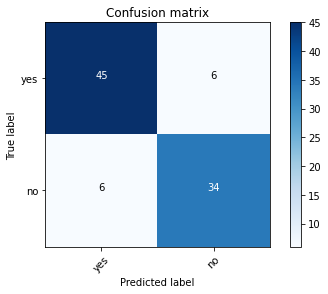

In [11]:
plt.grid(None)
eva.plot_confusion_matrix(normalize=False)
plt.savefig('rf(不处理).png', dpi=300, bbox_inches = 'tight')

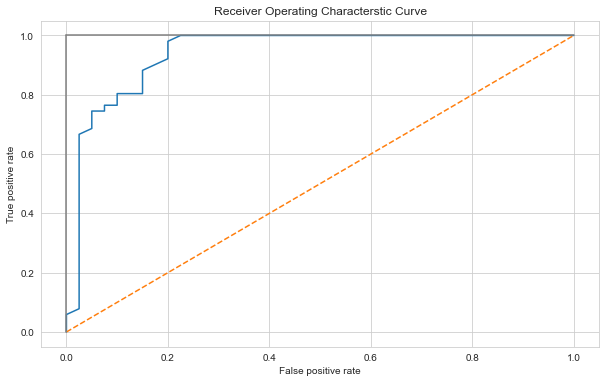

0.941421568627451


In [12]:
#Get predicted probabilites
target_probailities_rf = rf_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,
                                                             target_probailities_rf)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(rf_false_positive_rate,rf_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.savefig('rfROC(不处理).png', dpi=300, bbox_inches = 'tight')
plt.show()
#Calculate area under the curve
print(roc_auc_score(y_test,target_probailities_rf))

### Support Vector machine

In [9]:
from sklearn.svm import SVC
svm = SVC(probability=True)
params = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]}
svm_model = GridSearchCV(svm,params,cv=3)
svm_model.fit(X_train,y_train)
print(svm_model.best_params_)

{'C': 100}


In [10]:
real = pd.DataFrame(y_test.tolist())
pred = pd.DataFrame(svm_model.best_estimator_.predict(X_test).tolist())
real['pred'] = pred
real.columns = ['real','pred']
result = real
eva = evaluate(result)  
eva.show_all()

,evaluation
accuracy,0.769231
precision,0.767857
recall,0.843137
f-score,0.803738
TPR,0.843137
FPR,0.325000


Confusion matrix, without normalization
[[43  8]
 [13 27]]


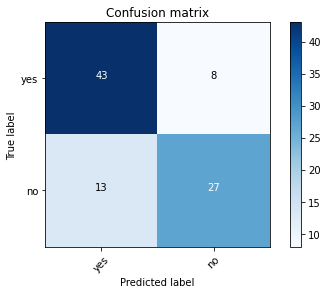

In [11]:
plt.grid(None)
eva.plot_confusion_matrix(normalize=False)
plt.savefig('svm(不处理).png', dpi=300, bbox_inches = 'tight')

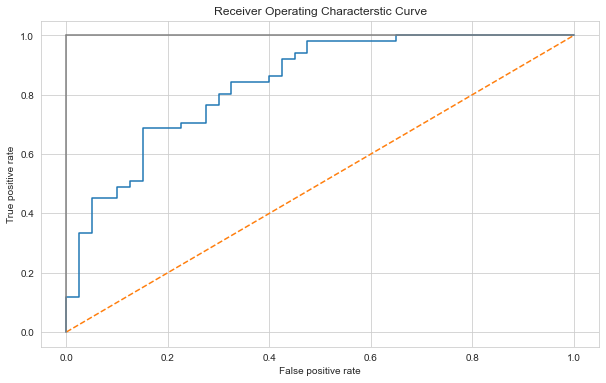

0.8377450980392157


In [12]:
#Get predicted probabilites
target_probailities_svm = svm_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(y_test,
                                                             target_probailities_svm)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(svm_false_positive_rate,svm_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.savefig('svmROC(不处理).png', dpi=300, bbox_inches = 'tight')
plt.show()
#Calculate area under the curve
print(roc_auc_score(y_test,target_probailities_svm))

### Gaussion NB

In [9]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB_model = NB.fit(X_train, y_train)

real = pd.DataFrame(y_test.tolist())
pred = pd.DataFrame(NB_model.predict(X_test).tolist())
real['pred'] = pred
real.columns = ['real','pred']
result = real
eva = evaluate(result)  
eva.show_all()

,evaluation
accuracy,0.901099
precision,0.920000
recall,0.901961
f-score,0.910891
TPR,0.901961
FPR,0.100000


Confusion matrix, without normalization
[[46  5]
 [ 4 36]]


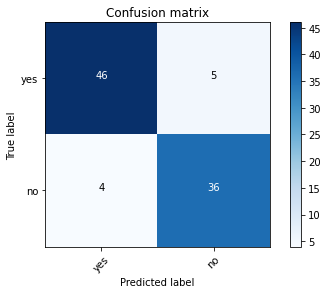

In [10]:
plt.grid(None)
eva.plot_confusion_matrix(normalize=False)
plt.savefig('NB(不处理).png', dpi=300, bbox_inches = 'tight')

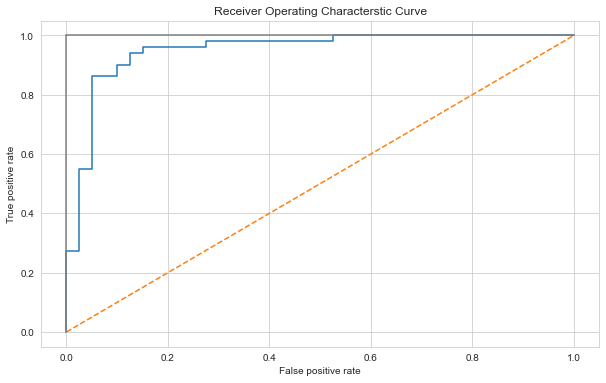

0.95


In [11]:
#Get predicted probabilites
target_probailities_NB = NB_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
NB_false_positive_rate,NB_true_positive_rate,NB_threshold = roc_curve(y_test,
                                                             target_probailities_NB)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(NB_false_positive_rate,NB_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.savefig('NBROC(不处理).png', dpi=300, bbox_inches = 'tight')
plt.show()
#Calculate area under the curve
print(roc_auc_score(y_test,target_probailities_NB))

### K nearest neighbor

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
          'p':list(range(1,10)),
          'weights':['uniform', 'distance']}
knn_model = GridSearchCV(knn,params,cv=3)
knn_model.fit(X_train,y_train)
print(knn_model.best_params_)           #print's parameters best values

{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}


In [10]:
real = pd.DataFrame(y_test.tolist())
pred = pd.DataFrame(knn_model.best_estimator_.predict(X_test).tolist())
real['pred'] = pred
real.columns = ['real','pred']
result = real
eva = evaluate(result)  
eva.show_all()

,evaluation
accuracy,0.758242
precision,0.773585
recall,0.803922
f-score,0.788462
TPR,0.803922
FPR,0.300000


Confusion matrix, without normalization
[[41 10]
 [12 28]]


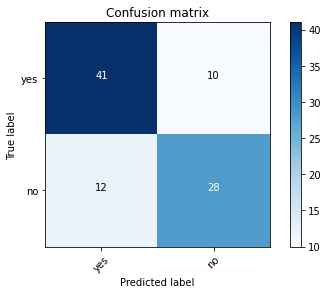

In [11]:
plt.grid(None)
eva.plot_confusion_matrix(normalize=False)
plt.savefig('knn(不处理)+dummy.png', dpi=300, bbox_inches = 'tight')

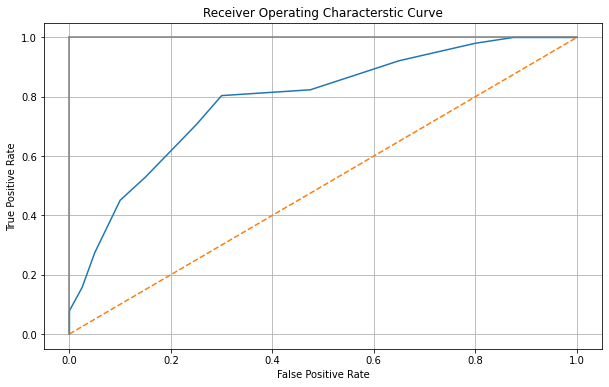

0.7875


In [12]:
#Get predicted probabilites from the model
target_probailities_knn = knn_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,target_probailities_knn)
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.savefig('knnROC(不处理)+dummy.png', dpi=300, bbox_inches = 'tight')
plt.show()
#Calculate area under the curve
print(roc_auc_score(y_test,target_probailities_knn))

### Neutral Network

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable

In [10]:
X_train1 = torch.FloatTensor(np.array(X_train))
X_test1 = torch.FloatTensor(np.array(X_test))
y_train1 = torch.LongTensor(np.array(y_train))
y_test1 = torch.LongTensor(np.array(y_test))

In [11]:
class Net(nn.Module):
    def __init__(self, in_count, output_count):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_count, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, output_count)
        self.softmax = nn.Softmax()
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [12]:
model = Net(X.shape[1], 2) 

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
final_losses = []
for epochs in range(1500):
    optimizer.zero_grad()
    out = model(X_train1)
    loss = criterion(out, y_train1)
    final_losses.append(loss)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epochs+1}, loss: {loss.item()}")

Epoch 1, loss: 0.85099858045578
Epoch 2, loss: 0.8509985208511353
Epoch 3, loss: 0.8509985208511353
Epoch 4, loss: 0.8509985208511353
Epoch 5, loss: 0.8509985208511353
Epoch 6, loss: 0.8509985208511353
Epoch 7, loss: 0.8509985208511353
Epoch 8, loss: 0.8509985208511353
Epoch 9, loss: 0.8509985208511353
Epoch 10, loss: 0.8509985208511353
Epoch 11, loss: 0.8509985208511353
Epoch 12, loss: 0.8509985208511353
Epoch 13, loss: 0.8509985208511353
Epoch 14, loss: 0.8509985208511353
Epoch 15, loss: 0.8509985208511353
Epoch 16, loss: 0.8509985208511353
Epoch 17, loss: 0.8509985208511353
Epoch 18, loss: 0.8509985208511353
Epoch 19, loss: 0.8509985208511353
Epoch 20, loss: 0.8509985208511353
Epoch 21, loss: 0.8509985208511353
Epoch 22, loss: 0.8509985208511353
Epoch 23, loss: 0.8509985208511353
Epoch 24, loss: 0.8509985208511353
Epoch 25, loss: 0.8509985208511353
Epoch 26, loss: 0.8509985208511353
Epoch 27, loss: 0.8509985208511353
Epoch 28, loss: 0.8509985208511353
Epoch 29, loss: 0.8509985208511

Epoch 247, loss: 0.8509985208511353
Epoch 248, loss: 0.8509985208511353
Epoch 249, loss: 0.8509985208511353
Epoch 250, loss: 0.8509985208511353
Epoch 251, loss: 0.8509985208511353
Epoch 252, loss: 0.8509985208511353
Epoch 253, loss: 0.8509985208511353
Epoch 254, loss: 0.8509985208511353
Epoch 255, loss: 0.8509985208511353
Epoch 256, loss: 0.8509985208511353
Epoch 257, loss: 0.8509985208511353
Epoch 258, loss: 0.8509985208511353
Epoch 259, loss: 0.8509985208511353
Epoch 260, loss: 0.8509985208511353
Epoch 261, loss: 0.8509985208511353
Epoch 262, loss: 0.8509985208511353
Epoch 263, loss: 0.8509985208511353
Epoch 264, loss: 0.8509985208511353
Epoch 265, loss: 0.8509985208511353
Epoch 266, loss: 0.8509985208511353
Epoch 267, loss: 0.8509985208511353
Epoch 268, loss: 0.8509985208511353
Epoch 269, loss: 0.8509985208511353
Epoch 270, loss: 0.8509985208511353
Epoch 271, loss: 0.8509985208511353
Epoch 272, loss: 0.8509985208511353
Epoch 273, loss: 0.8509985208511353
Epoch 274, loss: 0.850998520

Epoch 534, loss: 0.8509985208511353
Epoch 535, loss: 0.8509985208511353
Epoch 536, loss: 0.8509985208511353
Epoch 537, loss: 0.8509985208511353
Epoch 538, loss: 0.8509985208511353
Epoch 539, loss: 0.8509985208511353
Epoch 540, loss: 0.8509985208511353
Epoch 541, loss: 0.8509985208511353
Epoch 542, loss: 0.8509985208511353
Epoch 543, loss: 0.8509985208511353
Epoch 544, loss: 0.8509985208511353
Epoch 545, loss: 0.8509985208511353
Epoch 546, loss: 0.8509985208511353
Epoch 547, loss: 0.8509985208511353
Epoch 548, loss: 0.8509985208511353
Epoch 549, loss: 0.8509985208511353
Epoch 550, loss: 0.8509985208511353
Epoch 551, loss: 0.8509985208511353
Epoch 552, loss: 0.8509985208511353
Epoch 553, loss: 0.8509985208511353
Epoch 554, loss: 0.8509985208511353
Epoch 555, loss: 0.8509985208511353
Epoch 556, loss: 0.8509985208511353
Epoch 557, loss: 0.8509985208511353
Epoch 558, loss: 0.8509985208511353
Epoch 559, loss: 0.8509985208511353
Epoch 560, loss: 0.8509985208511353
Epoch 561, loss: 0.850998520

Epoch 810, loss: 0.8509985208511353
Epoch 811, loss: 0.8509985208511353
Epoch 812, loss: 0.8509985208511353
Epoch 813, loss: 0.8509985208511353
Epoch 814, loss: 0.8509985208511353
Epoch 815, loss: 0.8509985208511353
Epoch 816, loss: 0.8509985208511353
Epoch 817, loss: 0.8509985208511353
Epoch 818, loss: 0.8509985208511353
Epoch 819, loss: 0.8509985208511353
Epoch 820, loss: 0.8509985208511353
Epoch 821, loss: 0.8509985208511353
Epoch 822, loss: 0.8509985208511353
Epoch 823, loss: 0.8509985208511353
Epoch 824, loss: 0.8509985208511353
Epoch 825, loss: 0.8509985208511353
Epoch 826, loss: 0.8509985208511353
Epoch 827, loss: 0.8509985208511353
Epoch 828, loss: 0.8509985208511353
Epoch 829, loss: 0.8509985208511353
Epoch 830, loss: 0.8509985208511353
Epoch 831, loss: 0.8509985208511353
Epoch 832, loss: 0.8509985208511353
Epoch 833, loss: 0.8509985208511353
Epoch 834, loss: 0.8509985208511353
Epoch 835, loss: 0.8509985208511353
Epoch 836, loss: 0.8509985208511353
Epoch 837, loss: 0.850998520

Epoch 1099, loss: 0.8509985208511353
Epoch 1100, loss: 0.8509985208511353
Epoch 1101, loss: 0.8509985208511353
Epoch 1102, loss: 0.8509985208511353
Epoch 1103, loss: 0.8509985208511353
Epoch 1104, loss: 0.8509985208511353
Epoch 1105, loss: 0.8509985208511353
Epoch 1106, loss: 0.8509985208511353
Epoch 1107, loss: 0.8509985208511353
Epoch 1108, loss: 0.8509985208511353
Epoch 1109, loss: 0.8509985208511353
Epoch 1110, loss: 0.8509985208511353
Epoch 1111, loss: 0.8509985208511353
Epoch 1112, loss: 0.8509985208511353
Epoch 1113, loss: 0.8509985208511353
Epoch 1114, loss: 0.8509985208511353
Epoch 1115, loss: 0.8509985208511353
Epoch 1116, loss: 0.8509985208511353
Epoch 1117, loss: 0.8509985208511353
Epoch 1118, loss: 0.8509985208511353
Epoch 1119, loss: 0.8509985208511353
Epoch 1120, loss: 0.8509985208511353
Epoch 1121, loss: 0.8509985208511353
Epoch 1122, loss: 0.8509985208511353
Epoch 1123, loss: 0.8509985208511353
Epoch 1124, loss: 0.8509985208511353
Epoch 1125, loss: 0.8509985208511353
E

Epoch 1379, loss: 0.8509985208511353
Epoch 1380, loss: 0.8509985208511353
Epoch 1381, loss: 0.8509985208511353
Epoch 1382, loss: 0.8509985208511353
Epoch 1383, loss: 0.8509985208511353
Epoch 1384, loss: 0.8509985208511353
Epoch 1385, loss: 0.8509985208511353
Epoch 1386, loss: 0.8509985208511353
Epoch 1387, loss: 0.8509985208511353
Epoch 1388, loss: 0.8509985208511353
Epoch 1389, loss: 0.8509985208511353
Epoch 1390, loss: 0.8509985208511353
Epoch 1391, loss: 0.8509985208511353
Epoch 1392, loss: 0.8509985208511353
Epoch 1393, loss: 0.8509985208511353
Epoch 1394, loss: 0.8509985208511353
Epoch 1395, loss: 0.8509985208511353
Epoch 1396, loss: 0.8509985208511353
Epoch 1397, loss: 0.8509985208511353
Epoch 1398, loss: 0.8509985208511353
Epoch 1399, loss: 0.8509985208511353
Epoch 1400, loss: 0.8509985208511353
Epoch 1401, loss: 0.8509985208511353
Epoch 1402, loss: 0.8509985208511353
Epoch 1403, loss: 0.8509985208511353
Epoch 1404, loss: 0.8509985208511353
Epoch 1405, loss: 0.8509985208511353
E

Text(0, 0.5, 'loss')

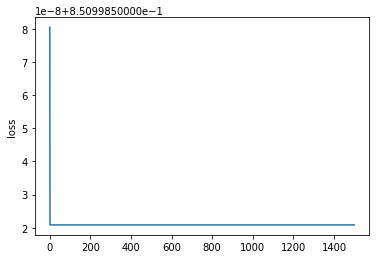

In [15]:
plt.plot(range(1500), final_losses)
plt.ylabel('loss')

In [16]:
pred = model(X_test1)
_, predict_classes = torch.max(pred,1)
real = pd.DataFrame(y_test1.tolist())
pred = pd.DataFrame(predict_classes.tolist())
real['pred'] = pred
real.columns = ['real','pred']
result = real
eva = evaluate(result)  
eva.show_all()

,evaluation
accuracy,0.43956
precision,NaN
recall,0.00000
f-score,NaN
TPR,0.00000
FPR,0.00000


Confusion matrix, without normalization
[[ 0 51]
 [ 0 40]]


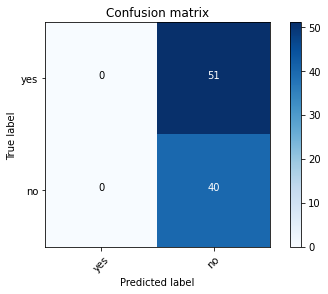

In [17]:
plt.grid(None)
eva.plot_confusion_matrix(normalize=False)
plt.savefig('nn(不处理).png', dpi=300, bbox_inches = 'tight')

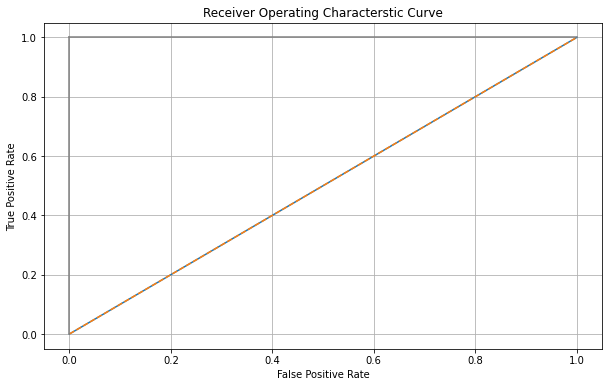

0.5


In [18]:
#Get predicted probabilites from the model
target_probailities_nn = pred
#Create true and false positive rates
false_positive_rate_nn,true_positive_rate_nn,threshold_nn = roc_curve(y_test,target_probailities_nn)
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(false_positive_rate_nn,true_positive_rate_nn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.savefig('nnROC(不处理).png', dpi=300, bbox_inches = 'tight')
plt.show()
#Calculate area under the curve
print(roc_auc_score(y_test,target_probailities_nn))